<a href="https://colab.research.google.com/github/qiuguangting/2025_ML_hws/blob/main/hw5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 匯入套件

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
import pickle

# 設定參數

In [19]:
max_features = 2000
maxlen = 100
batch_size = 32
embedding_dim = 128

# 載入 IMDb 資料集

In [20]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(f"訓練資料筆數: {len(x_train)}，測試資料筆數: {len(x_test)}")

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
訓練資料筆數: 25000，測試資料筆數: 25000


# 資料前處理

In [21]:
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

# 建立模型

In [22]:
model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=maxlen))
model.add(LSTM(units=64))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


# 訓練模型

In [23]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=5,
                    validation_split=0.2)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7065 - loss: 0.5471 - val_accuracy: 0.8242 - val_loss: 0.4278
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8503 - loss: 0.3508 - val_accuracy: 0.8368 - val_loss: 0.3656
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8783 - loss: 0.2992 - val_accuracy: 0.8254 - val_loss: 0.3821
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8866 - loss: 0.2712 - val_accuracy: 0.8354 - val_loss: 0.3754
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9024 - loss: 0.2445 - val_accuracy: 0.8352 - val_loss: 0.3789


# loss/accuracy 圖表

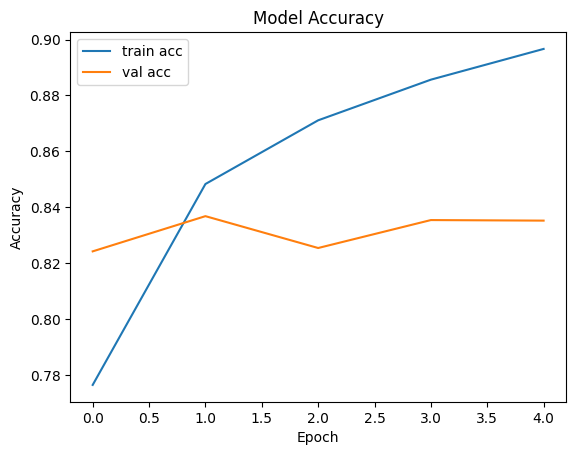

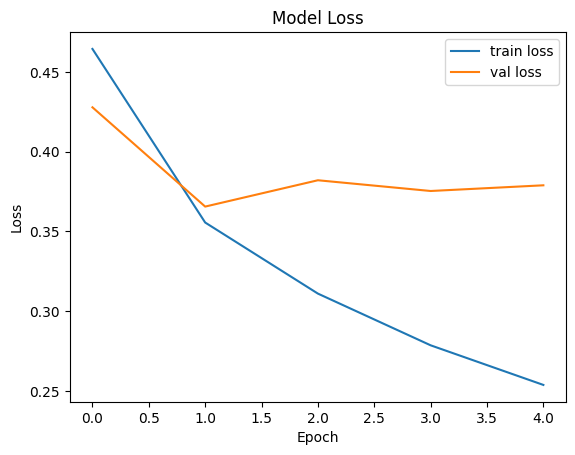

In [24]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 評估測試

In [25]:
score = model.evaluate(x_test, y_test, verbose=0)
print(f"測試準確率: {score[1]*100:.2f}%")

測試準確率: 84.48%


# 儲存 tokenizer

In [27]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
texts = [' '.join([reverse_word_index.get(i - 3, '?') for i in seq]) for seq in x_train[:2000]]
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(texts)

with open('data/imdb_tokenizer_2000.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

print("模型與 tokenizer 已儲存成功！")

模型與 tokenizer 已儲存成功！
